In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
APD_FILES = ['COBRA-YTD2017.xlsx', 'COBRA-YTD2016.xlsx', 'COBRA-YTD2015.xlsx', 'COBRA-YTD2014.xlsx', 'COBRA-YTD2013.xlsx']
DATA_PREFIX = 'data/'
data = pd.DataFrame() 
concatter = [] 
for file in APD_FILES: 
    tmp_data = pd.read_excel(DATA_PREFIX + file)
    concatter.append(tmp_data[['occur_date', 'occur_time', 'Avg Day', 'neighborhood']].dropna(how='any'))
    
data = pd.concat(concatter, axis=0).dropna(how="any")

In [74]:
data

,occur_date,occur_time,Avg Day,neighborhood
0,12/30/2017,23:15:00,Sat,Downtown
1,12/18/2017,13:00:00,Unk,Home Park
2,12/30/2017,22:01:00,Sat,Mechanicsville
3,12/30/2017,20:00:00,Sat,Castleberry Hill
4,12/31/2017,00:41:00,Sun,Adams Park
5,12/30/2017,23:00:00,Sun,East Atlanta
6,12/31/2017,01:55:00,Sun,Grant Park
7,12/31/2017,00:00:00,Sun,Old Fourth Ward
8,12/30/2017,00:00:00,Sat,Grant Park
9,12/31/2017,00:00:00,Sun,Peoplestown


In [79]:
from dateutil import parser

data['date'] = data['occur_date']
for index, row in data.iterrows():
    row['date'] = parser.parse(row['date'] + ' ' + row['occur_time'])

In [103]:
df = pd.DataFrame(data.date.dt.hour.value_counts())

,date
18,8891
19,8786
20,8478
12,8434
17,8414
22,7765
21,7723
15,7429
16,7376
0,7188


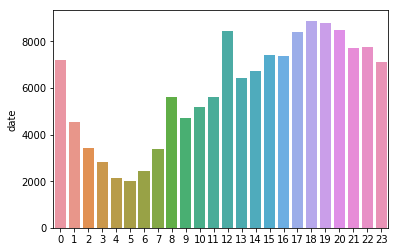

In [104]:
sns.barplot(x=df.index, y=df['date'])

Adair Park


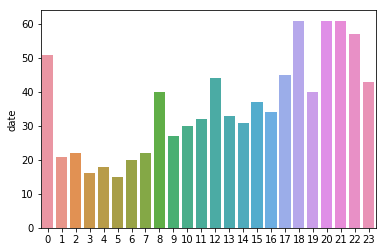

Adams Park


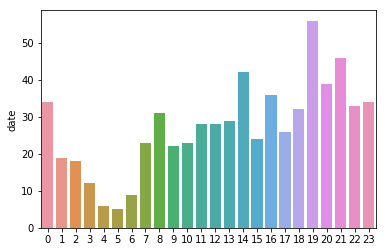

Adamsville


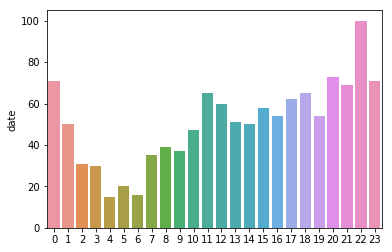

Almond Park


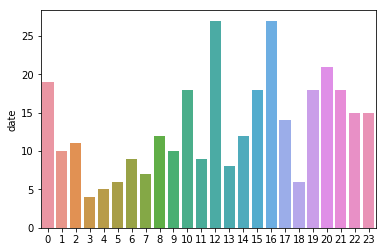

Amal Heights


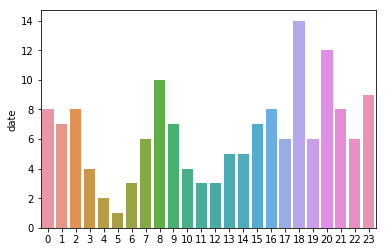

Ansley Park


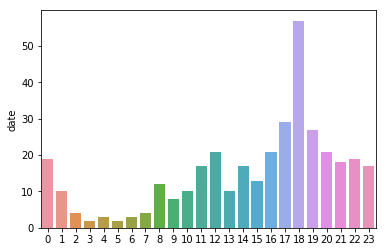

Arden/Habersham


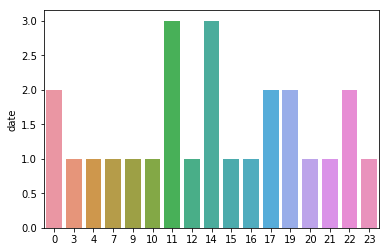

Ardmore


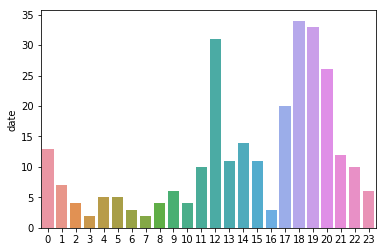

Argonne Forest


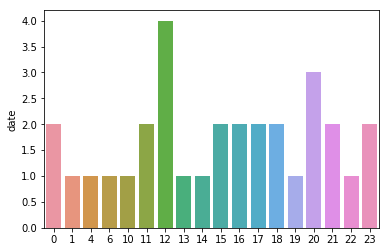

Arlington Estates


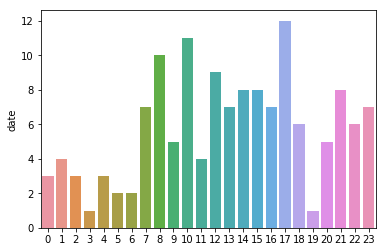

Ashley Courts


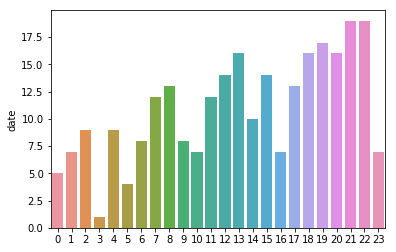

Ashview Heights


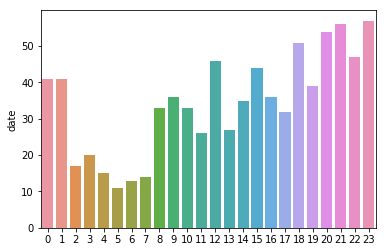

Atkins Park


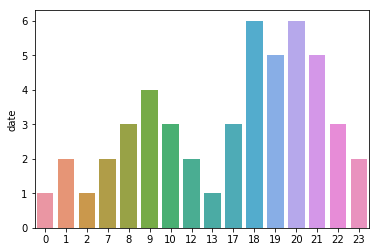

Atlanta Industrial Park


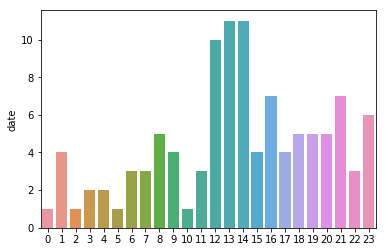

Atlanta University Center


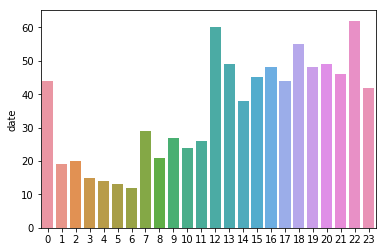

Atlantic Station


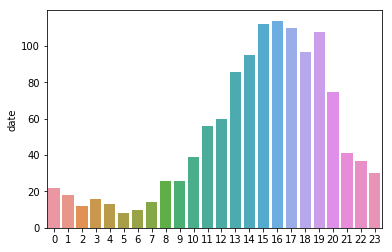

Audobon Forest


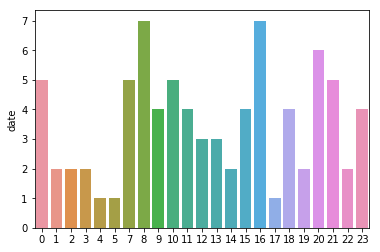

Audobon Forest West


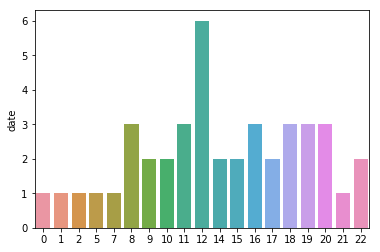

Baker Hills


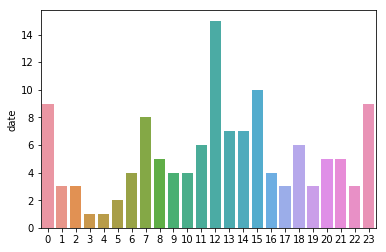

Bakers Ferry


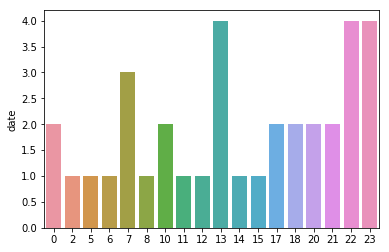

Bankhead


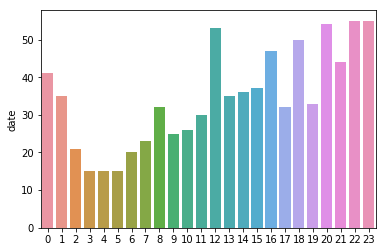

Bankhead Courts


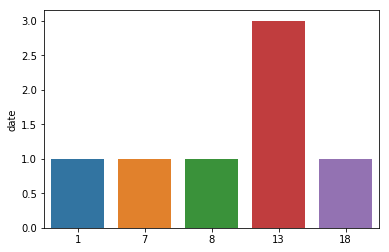

Bankhead/Bolton


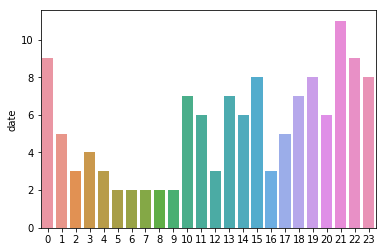

Beecher Hills


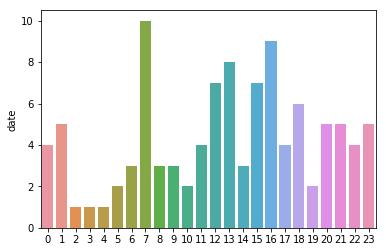

Ben Hill


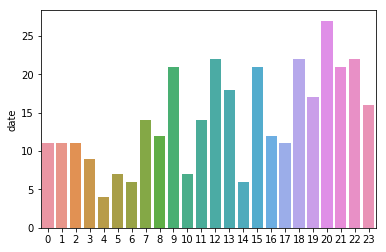

Ben Hill Acres


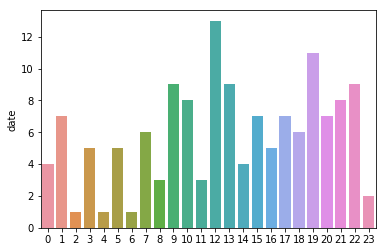

Ben Hill Forest


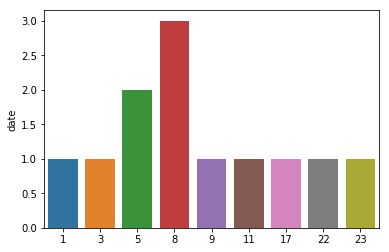

Ben Hill Pines


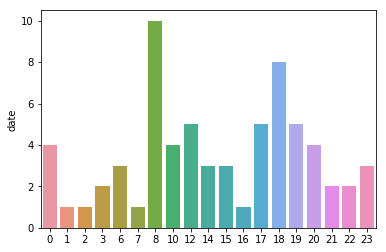

Ben Hill Terrace


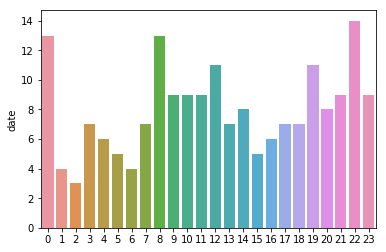

Benteen Park


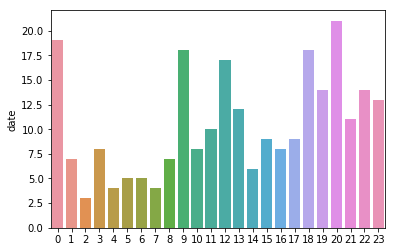

Berkeley Park


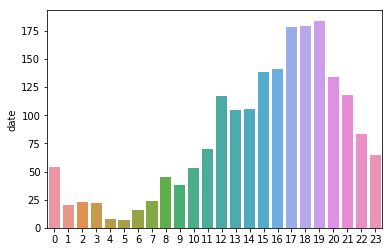

Betmar LaVilla


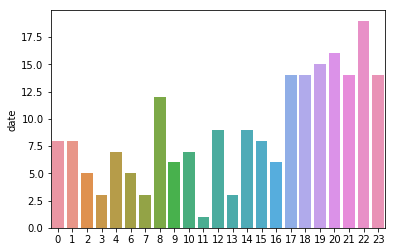

Blair Villa/Poole Creek


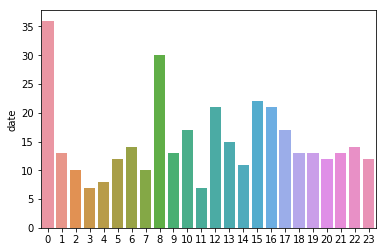

Blandtown


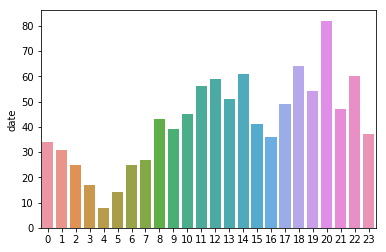

Bolton


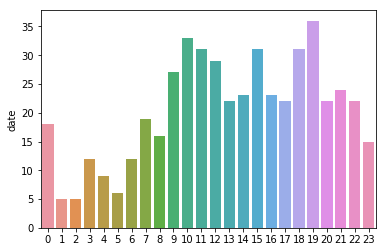

Bolton Hills


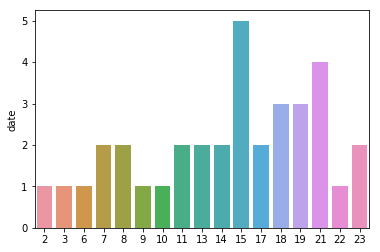

Boulder Park


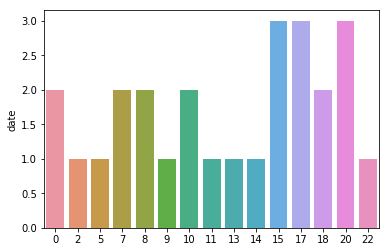

Boulevard Heights


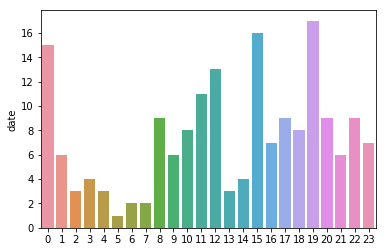

Brandon


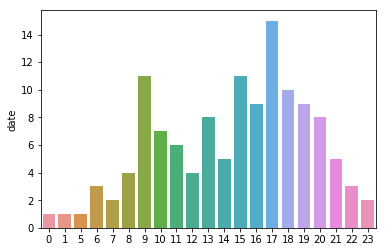

Brentwood


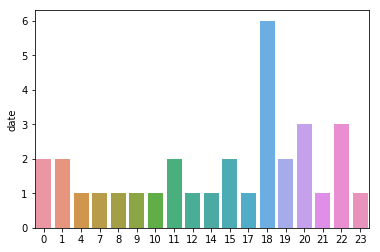

Briar Glen


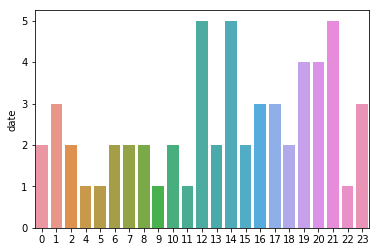

Brookhaven


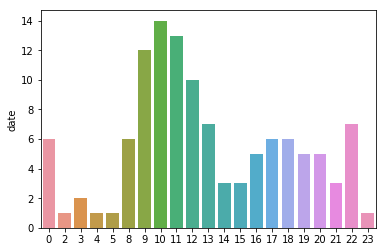

Brookview Heights


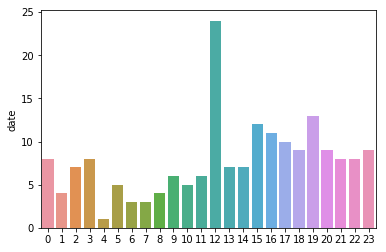

Brookwood


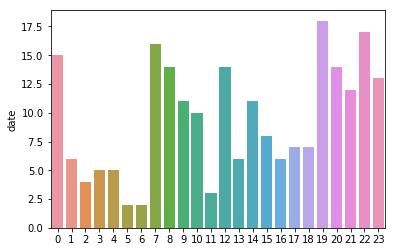

Brookwood Hills


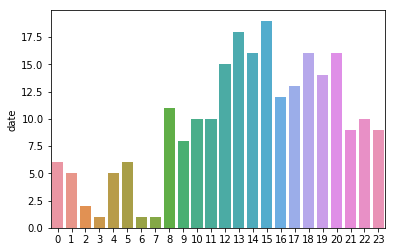

Browns Mill Park


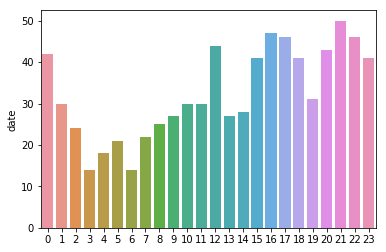

Buckhead Forest


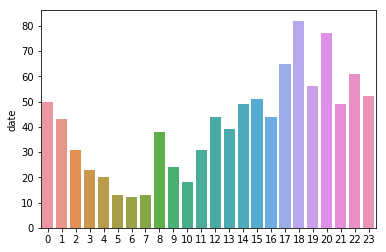

Buckhead Heights


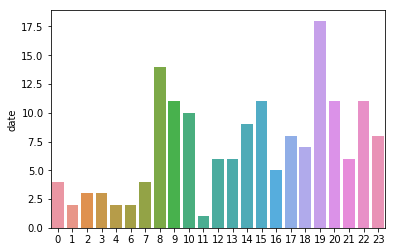

Buckhead Village


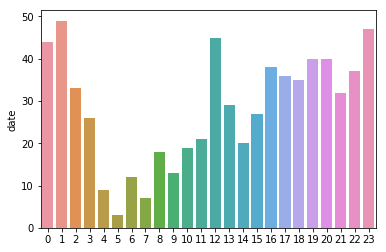

Bush Mountain


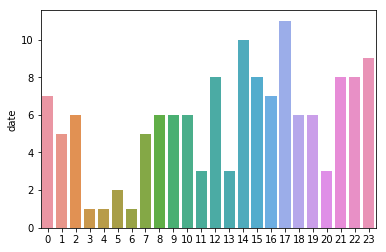

Butner/Tell


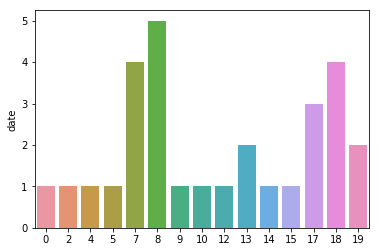

Cabbagetown


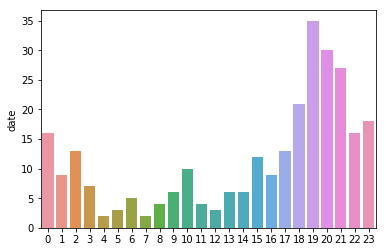

Campbellton Road


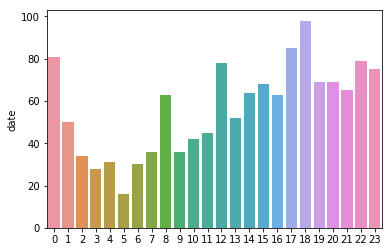

Candler Park


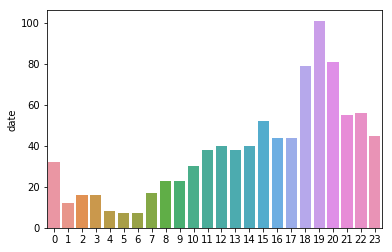

Capitol Gateway


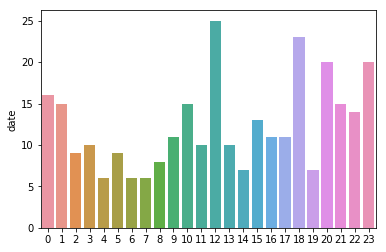

Capitol View


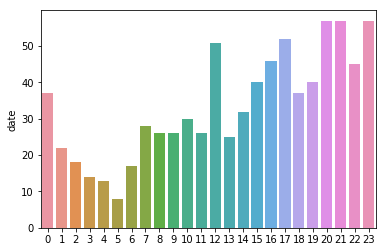

Capitol View Manor


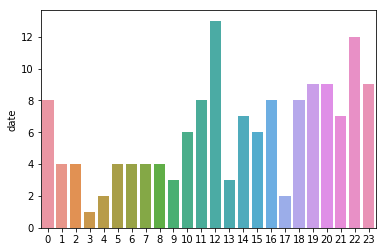

Carey Park


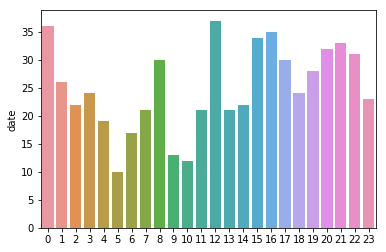

Carroll Heights


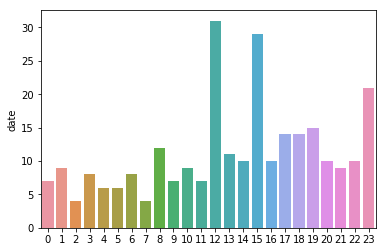

Carver Hills


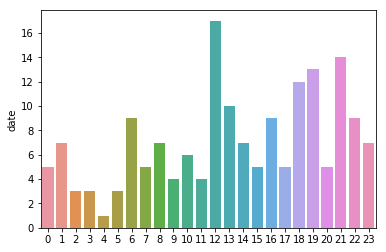

Cascade Avenue/Road


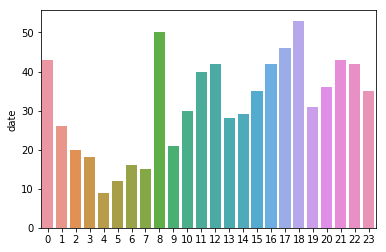

Cascade Green


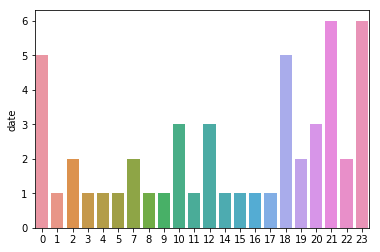

Cascade Heights


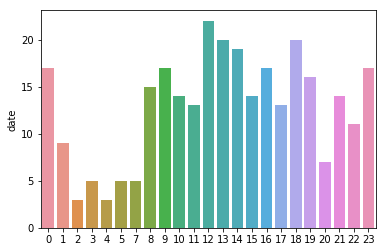

Castleberry Hill


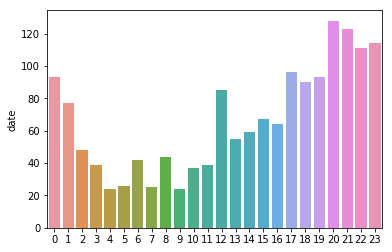

Castlewood


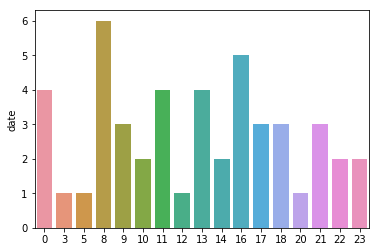

Center Hill


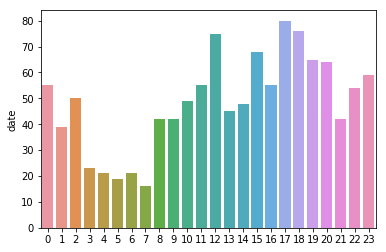

Chalet Woods


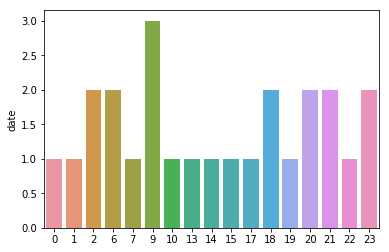

Channing Valley


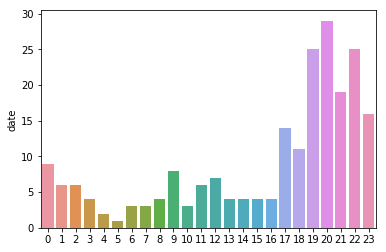

Chastain Park


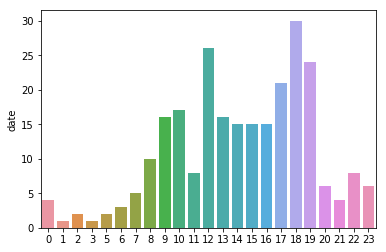

Chattahoochee


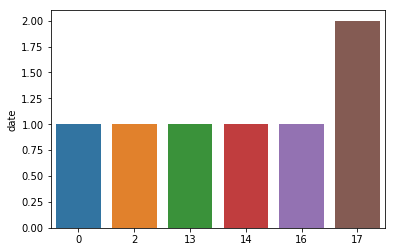

Chosewood Park


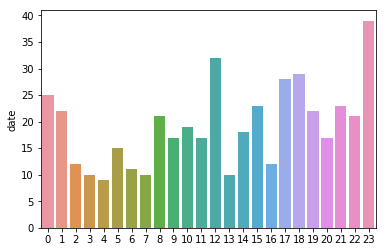

Collier Heights


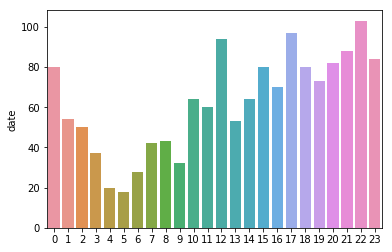

Collier Hills


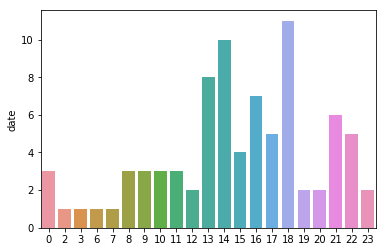

Collier Hills North


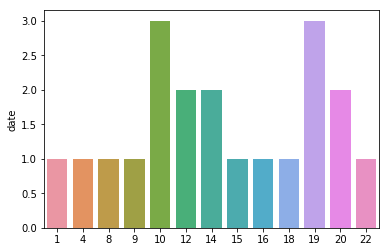

Colonial Homes


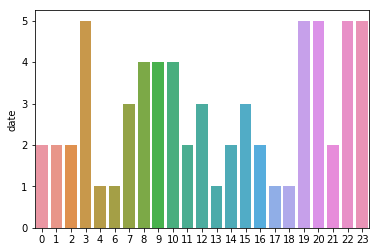

Cross Creek


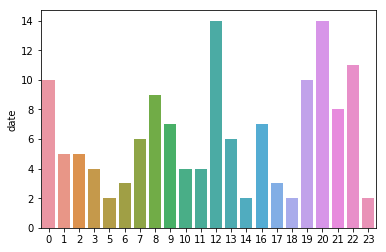

Custer/McDonough/Guice


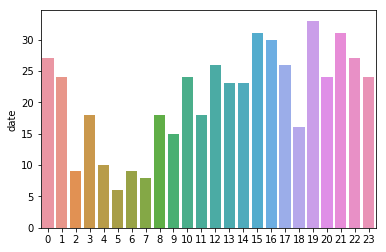

Deerwood


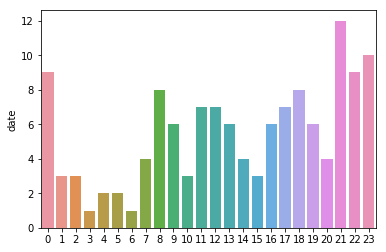

Dixie Hills


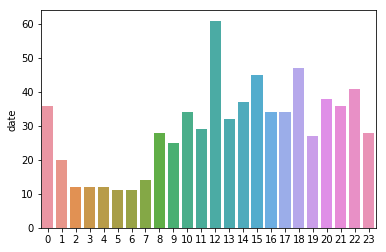

Downtown


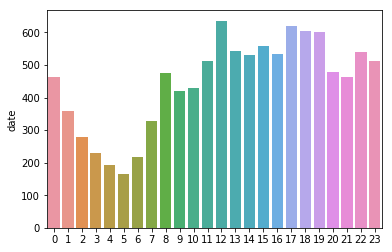

Druid Hills


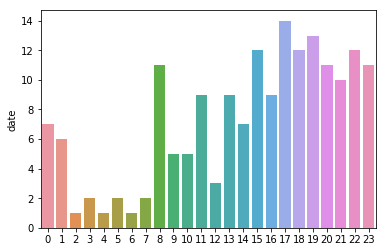

East Ardley Road


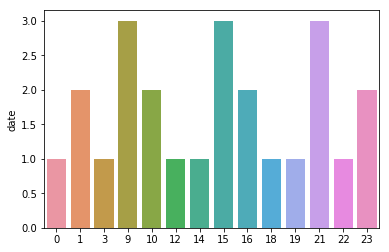

East Atlanta


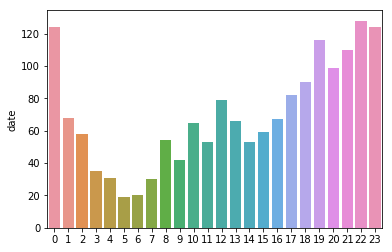

East Chastain Park


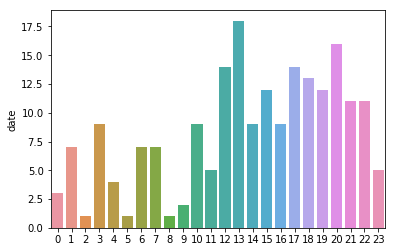

East Lake


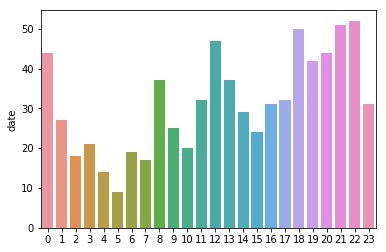

Edgewood


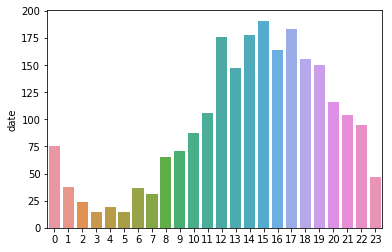

Elmco Estates


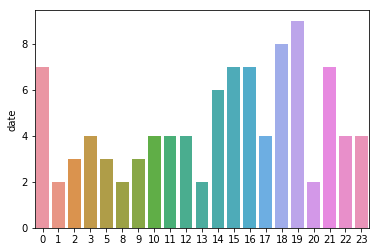

English Avenue


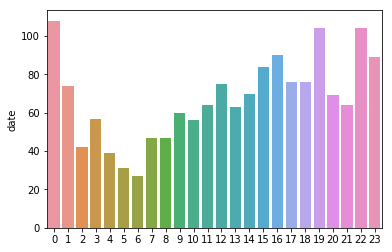

English Park


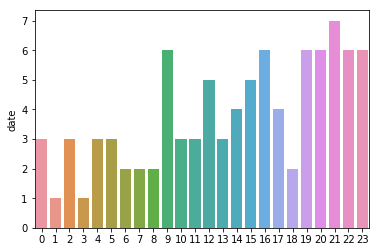

Fairburn


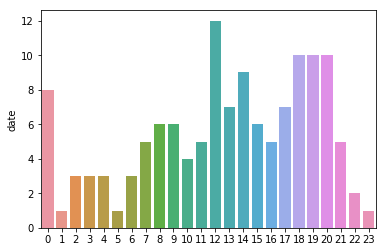

Fairburn Heights


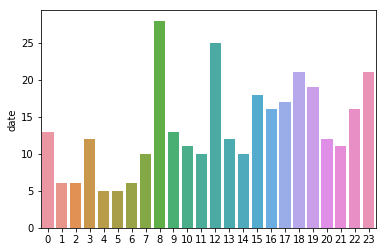

Fairburn Mays


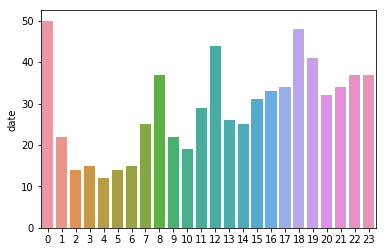

Fairburn Road/Wisteria Lane


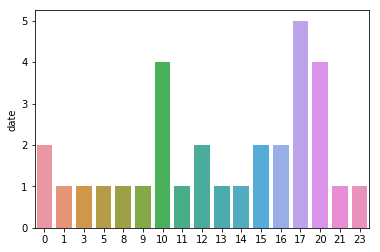

Fairburn Tell


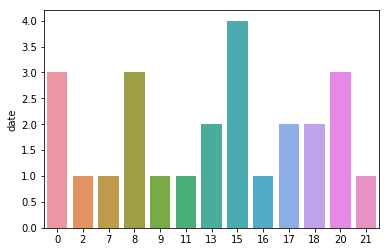

Fairway Acres


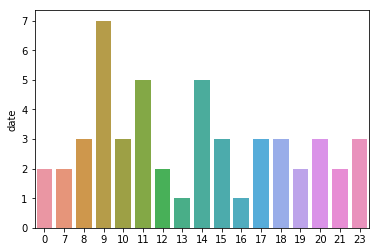

Fernleaf


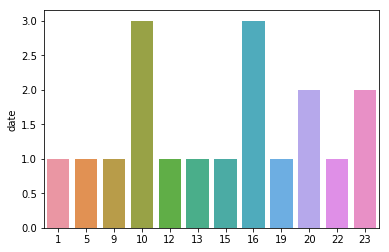

Florida Heights


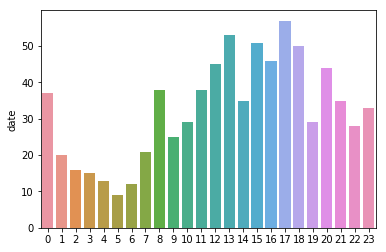

Fort McPherson


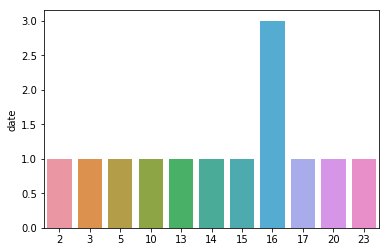

Fort Valley


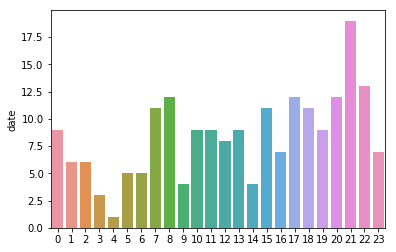

Garden Hills


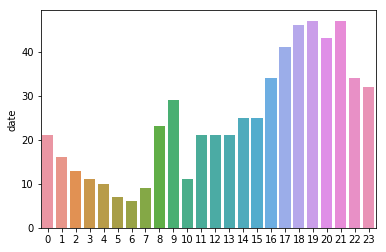

Georgia Tech


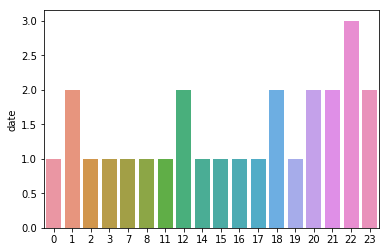

Glenrose Heights


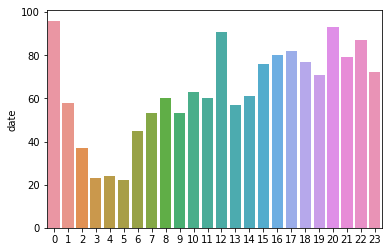

Grant Park


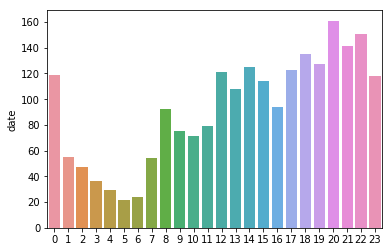

Green Acres Valley


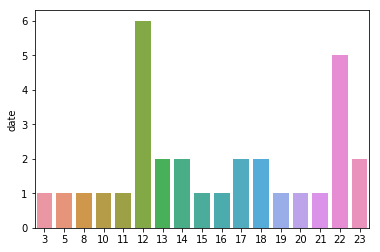

Green Forest Acres


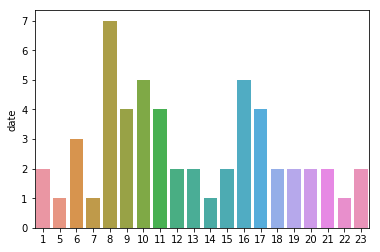

Greenbriar


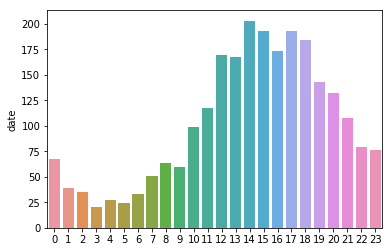

Greenbriar Village


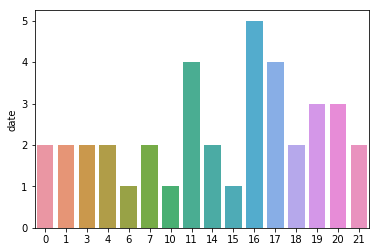

Grove Park


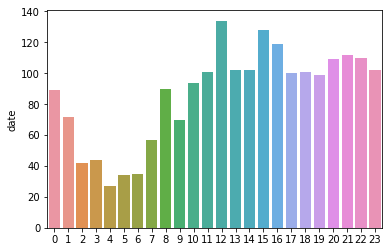

Hammond Park


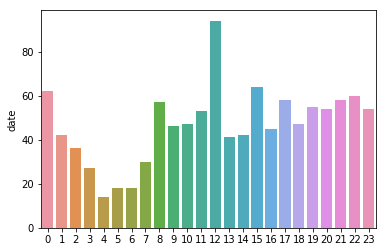

Hanover West


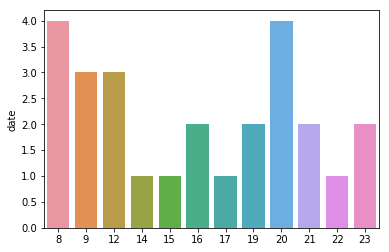

Harland Terrace


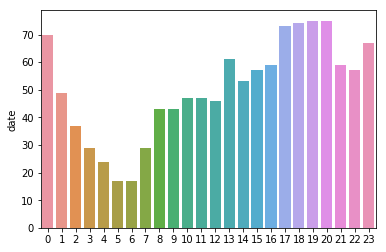

Harris Chiles


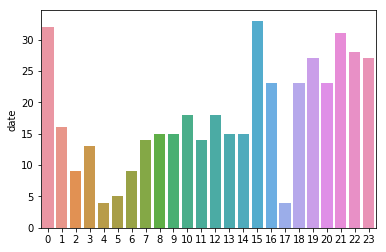

Harvel Homes Community


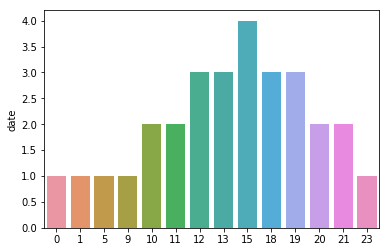

Heritage Valley


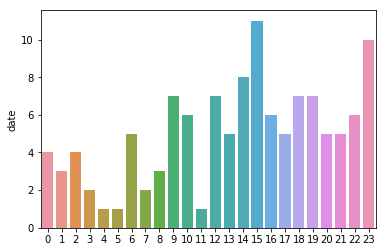

High Point


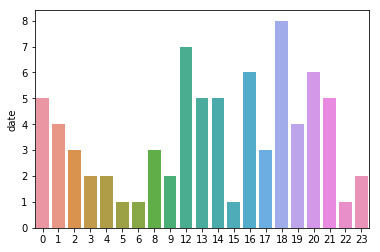

Hills Park


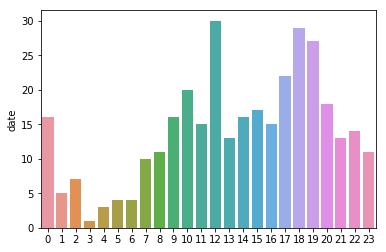

Home Park


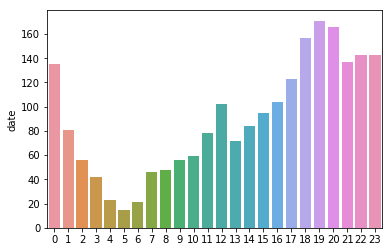

Horseshoe Community


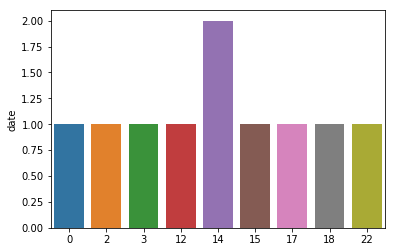

Hunter Hills


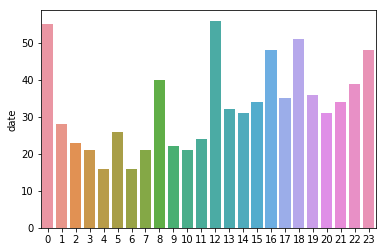

Huntington


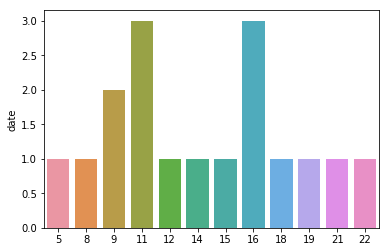

Inman Park


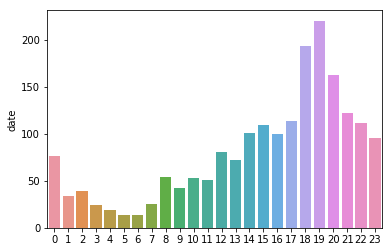

Ivan Hill


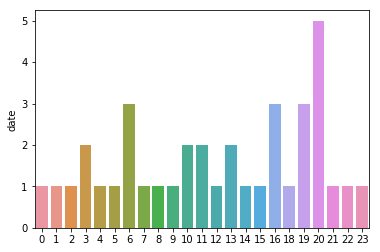

Joyland


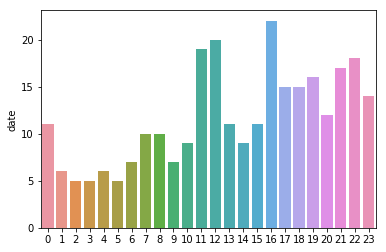

Just Us


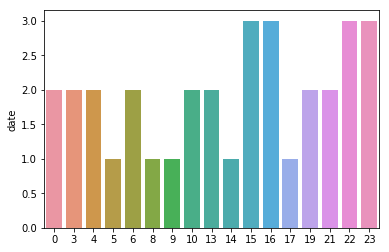

Kings Forest


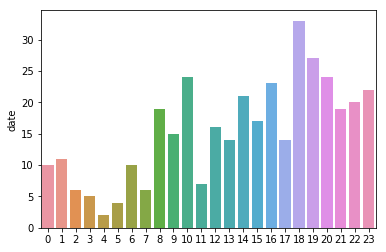

Kingswood


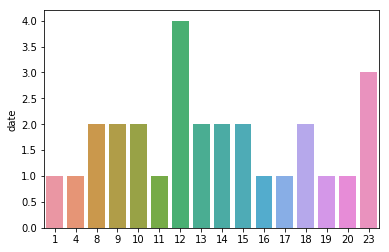

Kirkwood


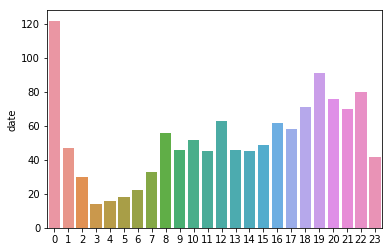

Knight Park/Howell Station


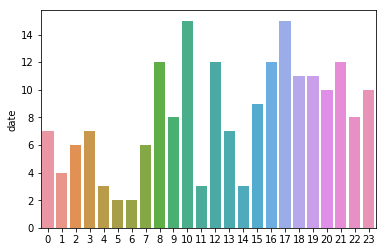

Lake Claire


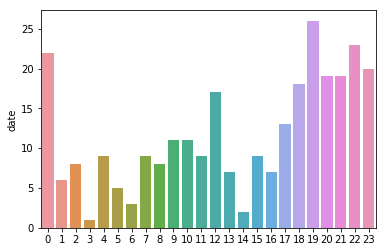

Lake Estates


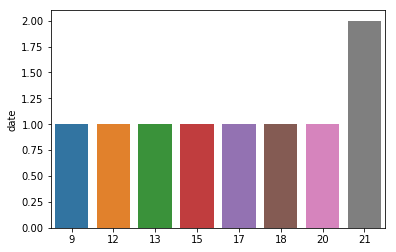

Lakewood


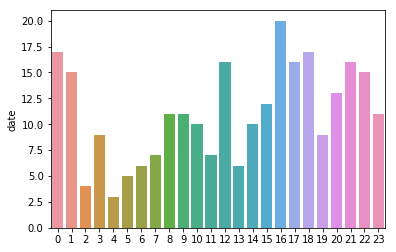

Lakewood Heights


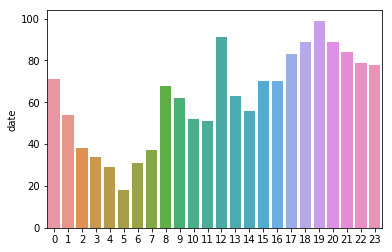

Laurens Valley


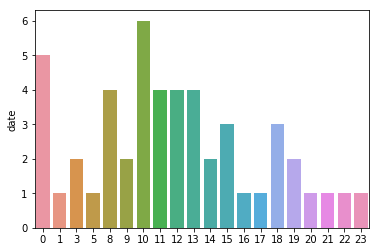

Leila Valley


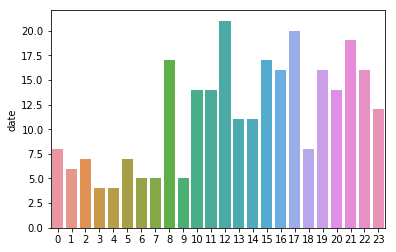

Lenox


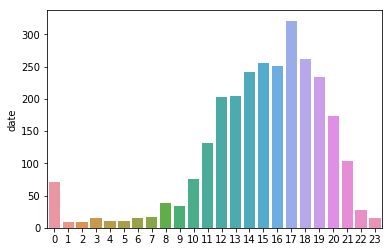

Lincoln Homes


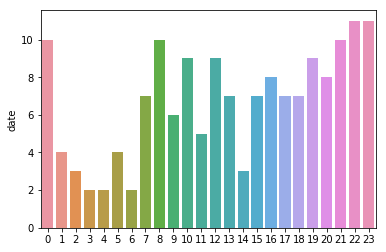

Lindbergh/Morosgo


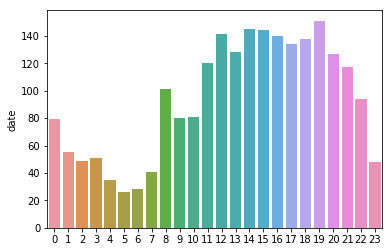

Lindridge/Martin Manor


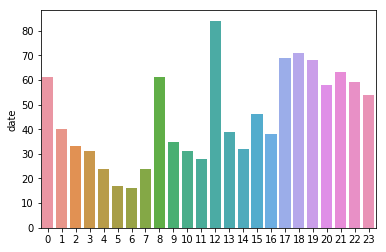

Loring Heights


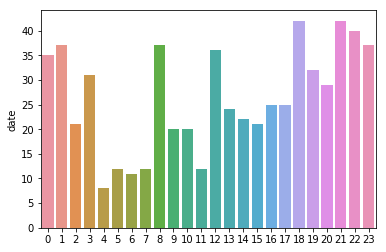

Magnum Manor


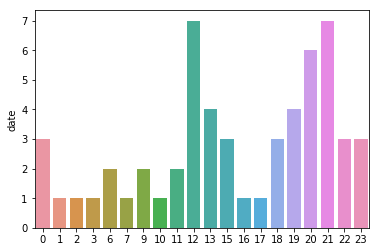

Margaret Mitchell


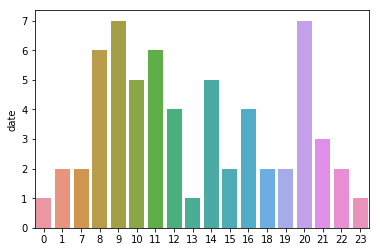

Marietta Street Artery


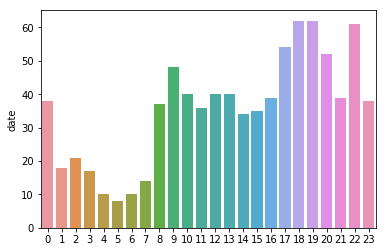

Mays


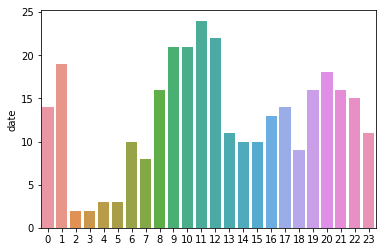

Meadowbrook Forest


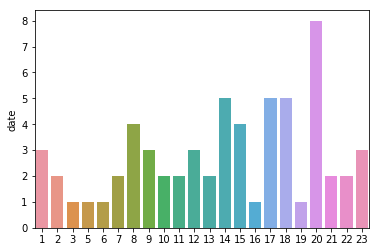

Mechanicsville


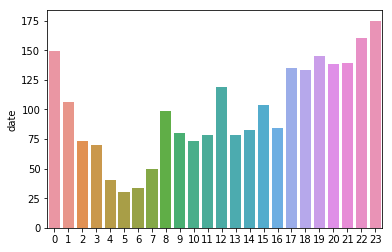

Mellwood


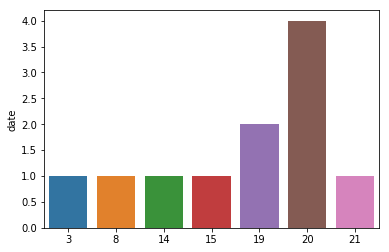

Memorial Park


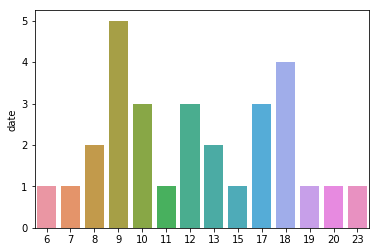

Midtown


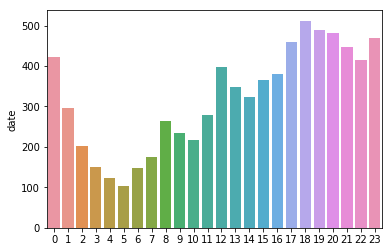

Midwest Cascade


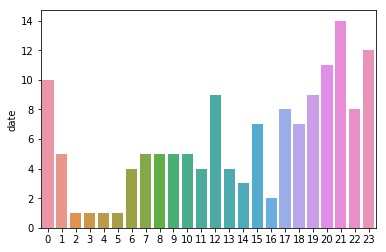

Monroe Heights


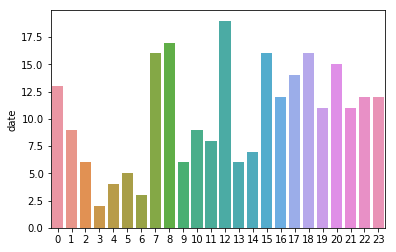

Morningside/Lenox Park


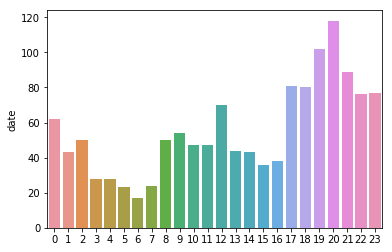

Mozley Park


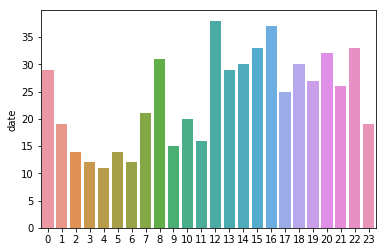

Mt. Gilead Woods


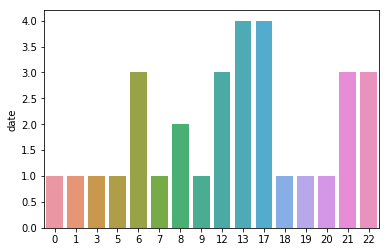

Mt. Paran Parkway


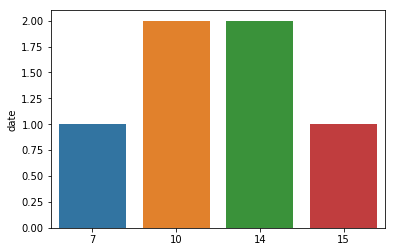

Mt. Paran/Northside


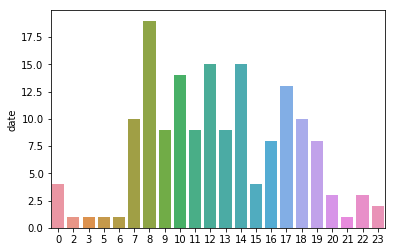

Niskey Cove


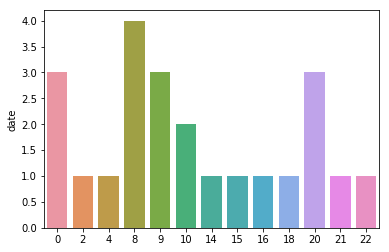

Niskey Lake


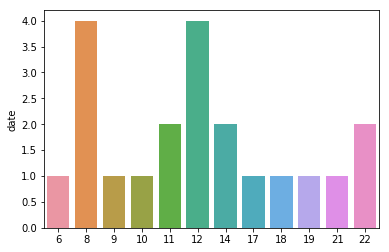

North Buckhead


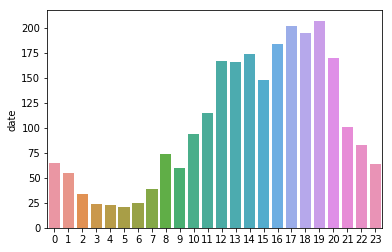

Norwood Manor


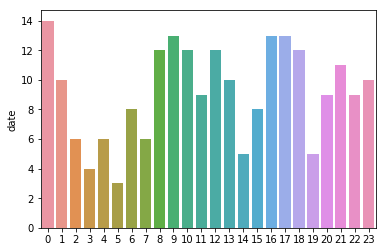

Oakcliff


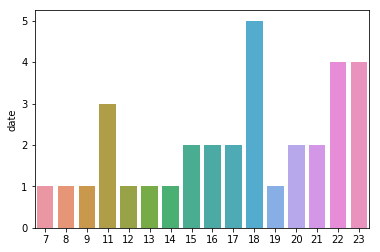

Oakland


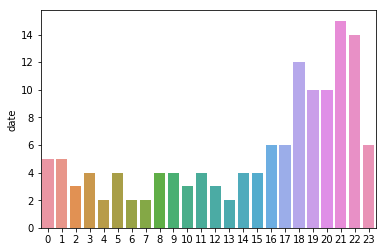

Oakland City


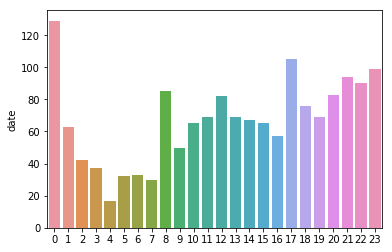

Old Fairburn Village


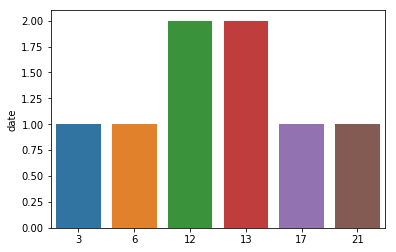

Old Fourth Ward


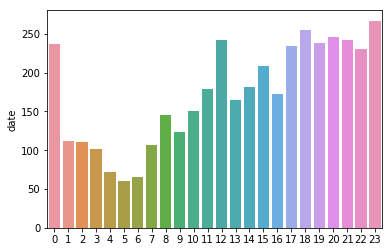

Old Gordon


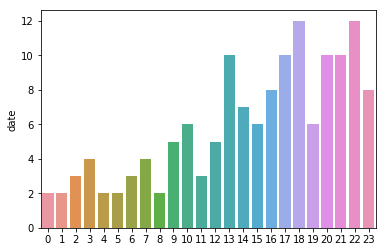

Orchard Knob


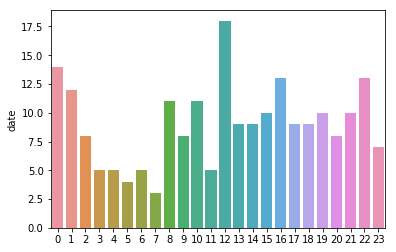

Ormewood Park


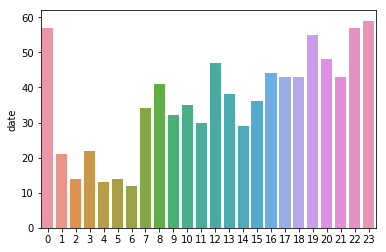

Paces


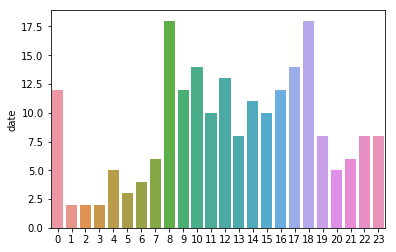

Peachtree Battle Alliance


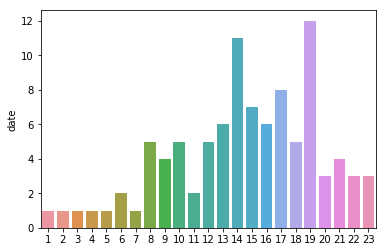

Peachtree Heights East


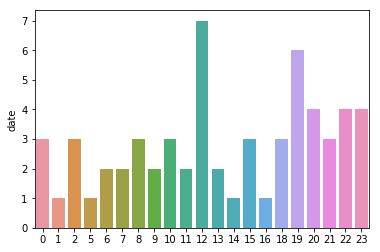

Peachtree Heights West


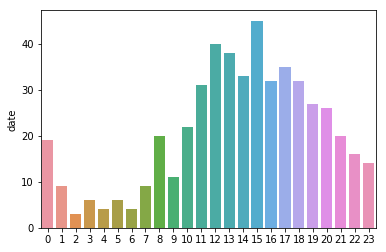

Peachtree Hills


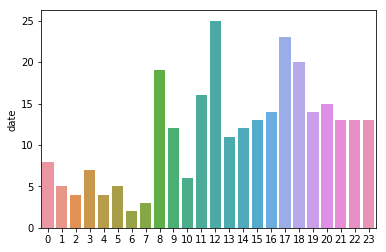

Peachtree Park


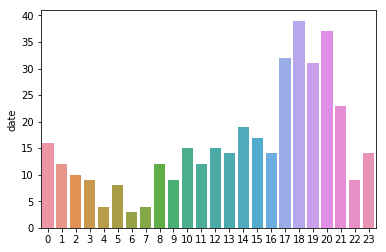

Penelope Neighbors


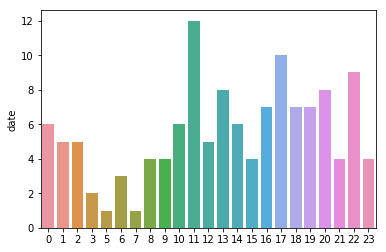

Peoplestown


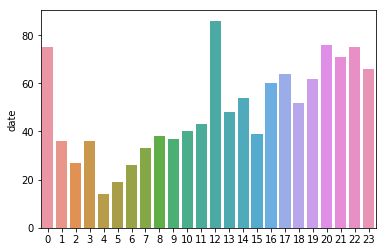

Perkerson


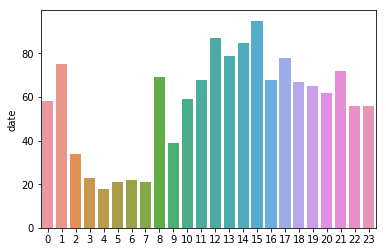

Peyton Forest


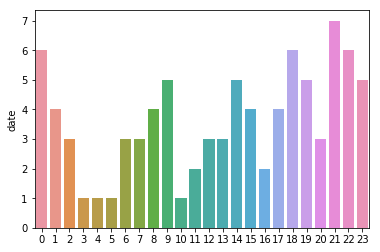

Piedmont Heights


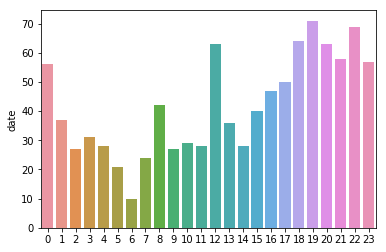

Pine Hills


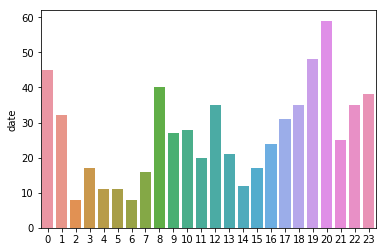

Pittsburgh


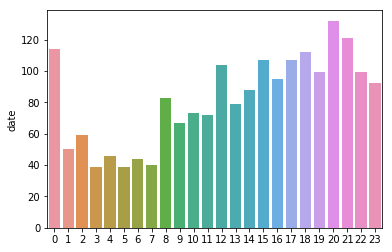

Pleasant Hill


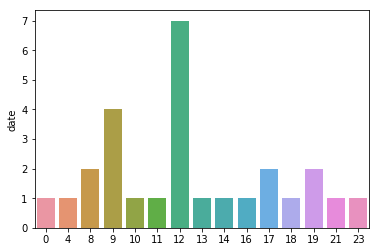

Polar Rock


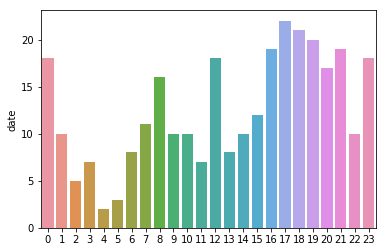

Pomona Park


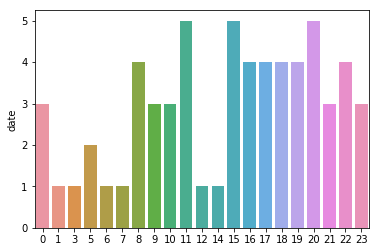

Poncey-Highland


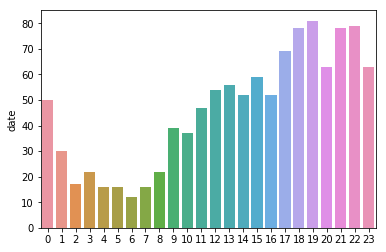

Princeton Lakes


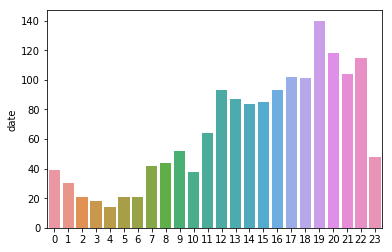

Randall Mill


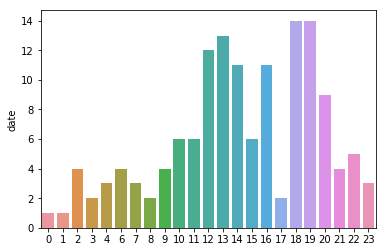

Rebel Valley Forest


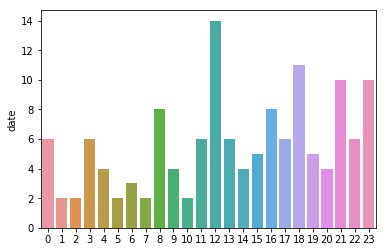

Regency Trace


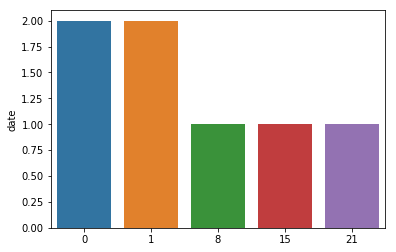

Reynoldstown


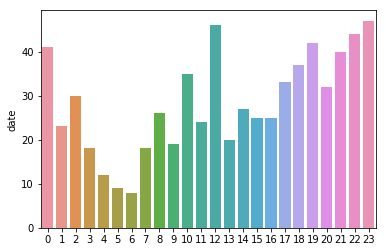

Ridgecrest Forest


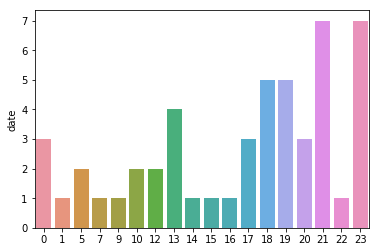

Ridgedale Park


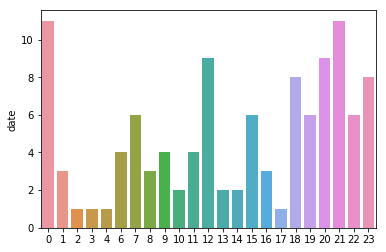

Ridgewood Heights


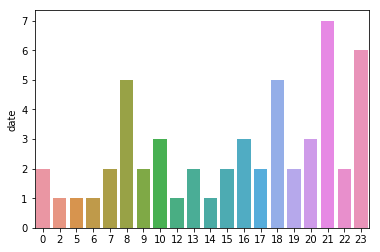

Riverside


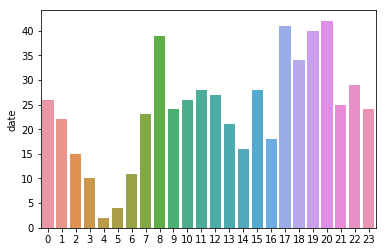

Rockdale


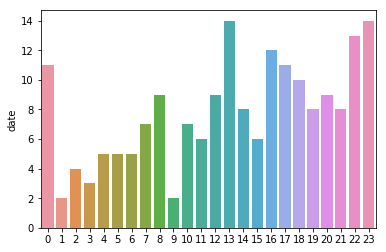

Rosedale Heights


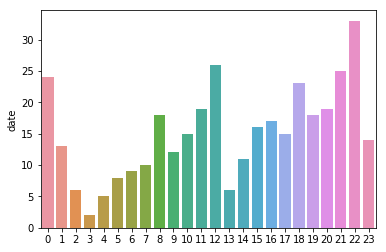

Rue Royal


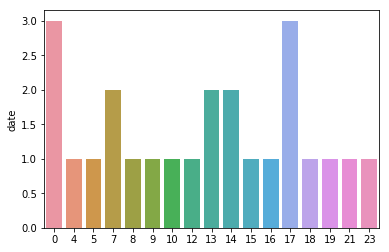

Sandlewood Estates


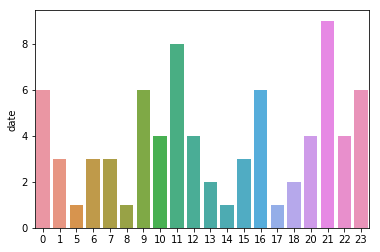

Scotts Crossing


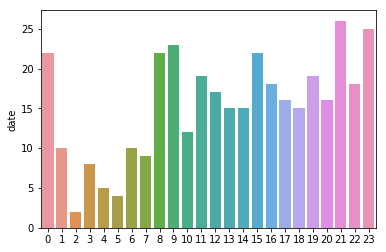

Sherwood Forest


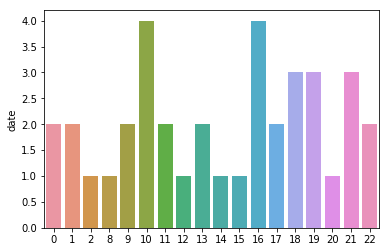

South Atlanta


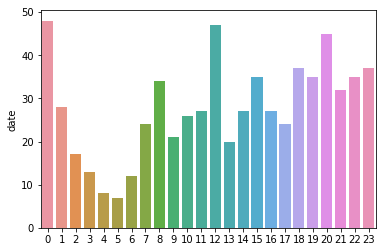

South River Gardens


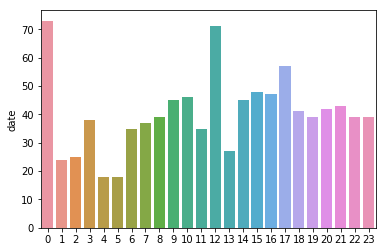

South Tuxedo Park


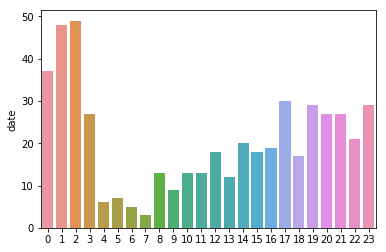

Southwest


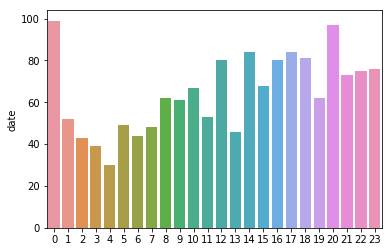

Springlake


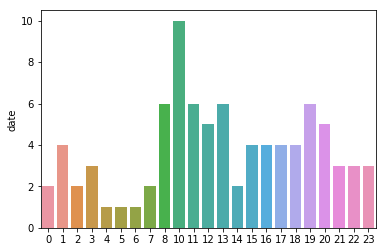

State Facility


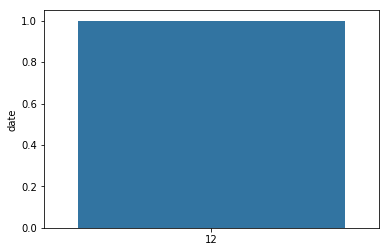

Summerhill


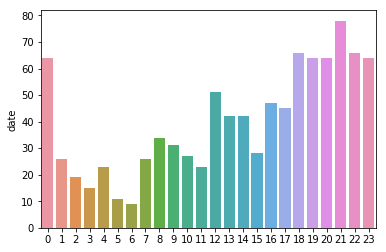

Swallow Circle/Baywood


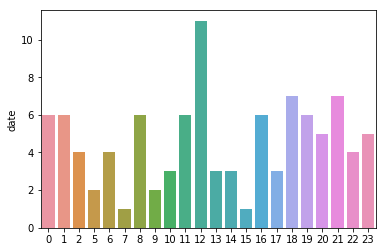

Sweet Auburn


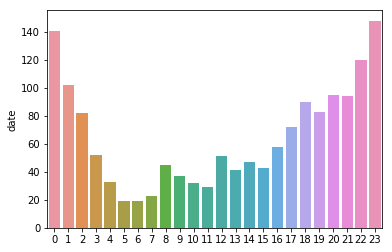

Sylvan Hills


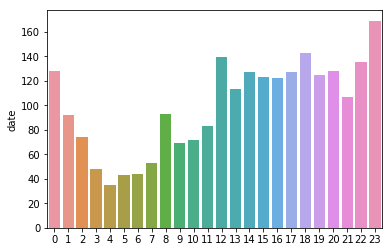

Tampa Park


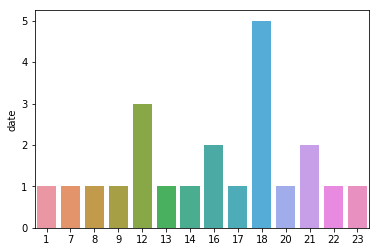

The Villages at Carver


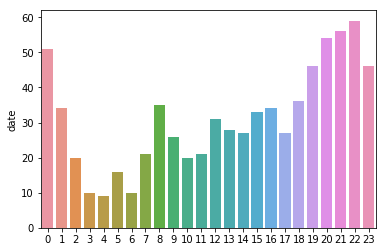

The Villages at Castleberry H


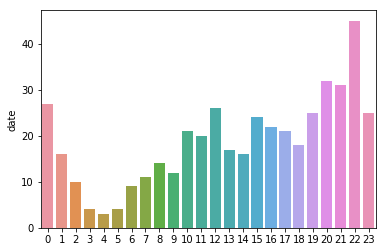

The Villages at East Lake


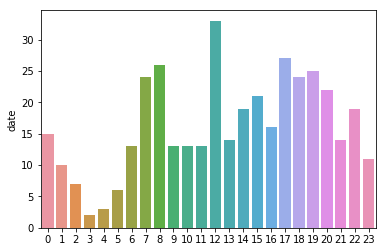

Thomasville Heights


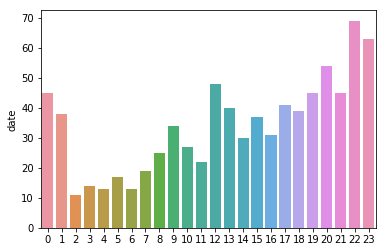

Tuxedo Park


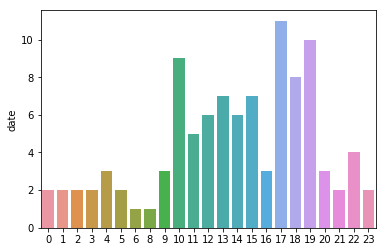

Underwood Hills


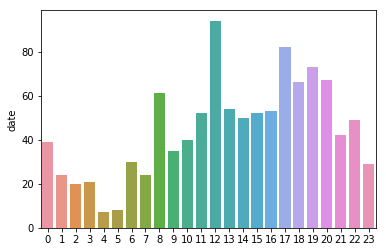

Venetian Hills


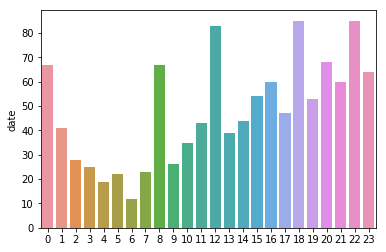

Vine City


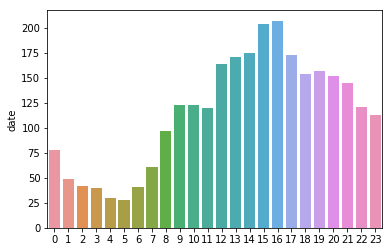

Virginia Highland


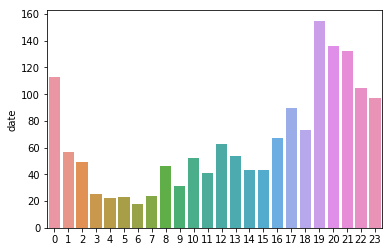

Washington Park


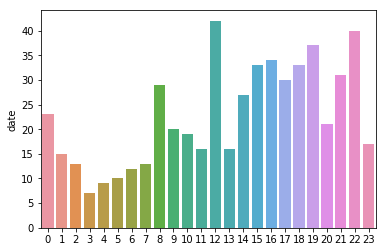

Wesley Battle


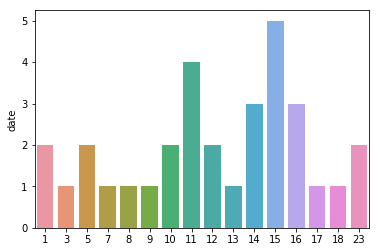

West End


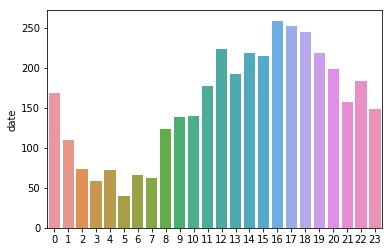

West Highlands


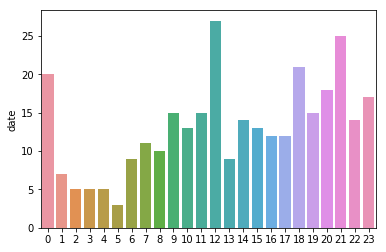

West Lake


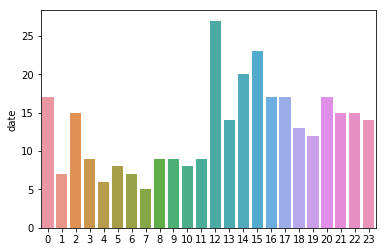

West Manor


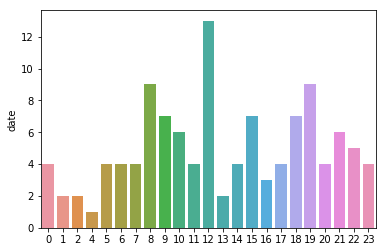

West Paces Ferry/Northside


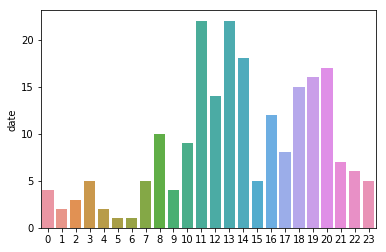

Westhaven


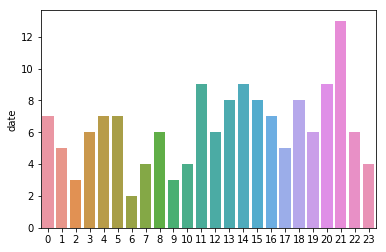

Westminster/Milmar


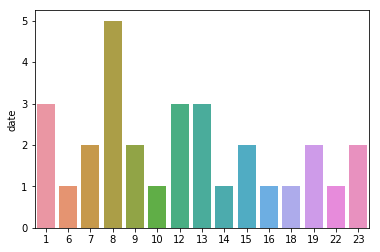

Westover Plantation


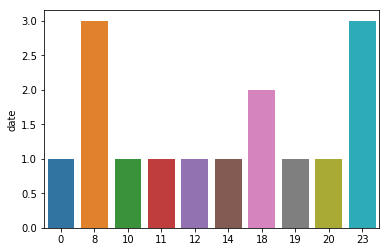

Westview


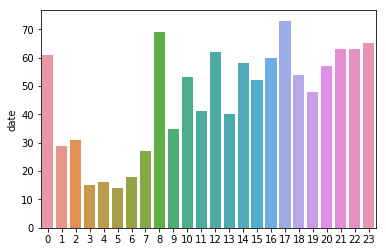

Westwood Terrace


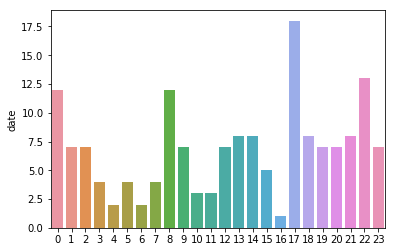

Whitewater Creek


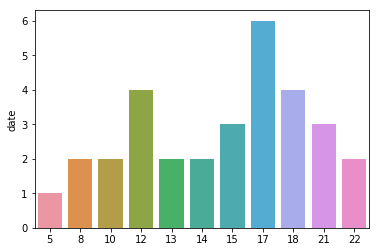

Whittier Mill Village


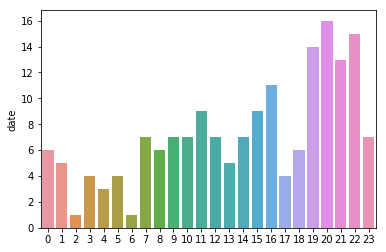

Wildwood (NPU-C)


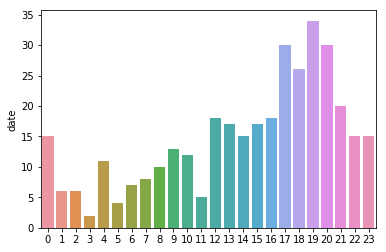

Wildwood (NPU-H)


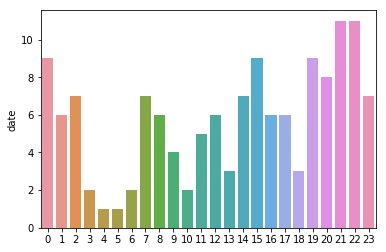

Wildwood Forest


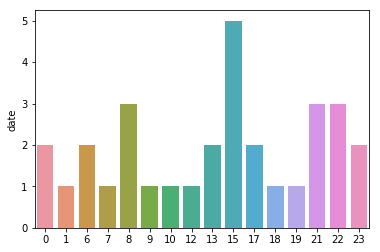

Wilson Mill Meadows


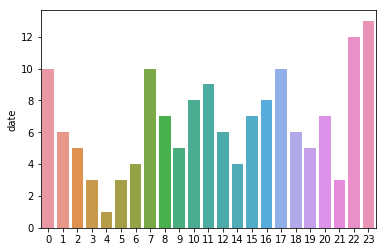

Wisteria Gardens


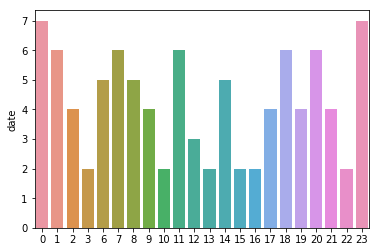

Woodfield


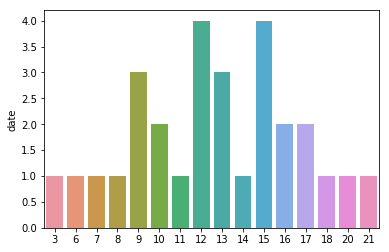

Woodland Hills


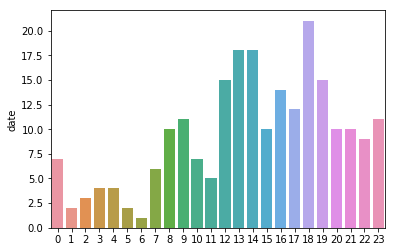

Wyngate


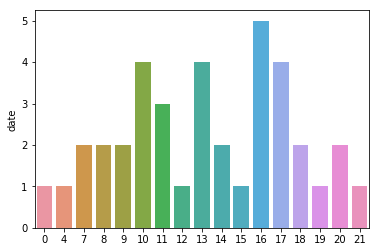

In [120]:
grouped = data.groupby('neighborhood')

for name, group in grouped:
    print(name)
    df = pd.DataFrame(group.date.dt.hour.value_counts())
    sns.barplot(x=df.index, y=df['date'])
    plt.show()